<a href="https://colab.research.google.com/github/pranavgupta0001/yorkUCourses/blob/main/phys4060/phys4060_esse4020project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import periodogram, correlate, butter, lfilter, freqz, sosfilt, filtfilt, welch, bode
from numpy.fft import fft, fftfreq

# Series Setup

In [ ]:
# Define sinusoid parameters
np.random.seed(52)

# Number of sinusoids
num_sinusoids = 7

# Frequencies (at least four octaves wide)
frequencies = np.logspace(0, 4, num_sinusoids, base=2)

# Amplitudes (ratio of largest to smallest amplitude is at least 10)
amplitudes = np.linspace(1, 10, num_sinusoids)
# define the noise
noise_amplitude = amplitudes[0]+ (amplitudes[1] - amplitudes[0]) / 2

# shuffle the amplitudes
np.random.shuffle(amplitudes)

# Phases
phases = np.random.uniform(0, 2*np.pi, num_sinusoids)

# Sampling interval delta, ∆
Tmin = 1 / frequencies[-1]  # period of the wave with the smallest period
delta = 0.25 * Tmin

# Time vector (slightly longer than the largest period)
Tmax = 1 / frequencies[0]  # period of the wave with the largest period
##################################extend it here###############################
t = np.arange(0, 2*Tmax + 25*delta, delta)
###############################################################################



############2
# Frequencies (at least four octaves wide)
frequencies2 = 1.5*frequencies#np.logspace(0, 4, num_sinusoids, base=2)

# Amplitudes (ratio of largest to smallest amplitude is at least 10)
amplitudes2 = 1.5*amplitudes#np.linspace(1.5, 15, num_sinusoids)
# define the noise
noise_amplitude2 =amplitudes2[1]+ (amplitudes2[3] - amplitudes2[1]) / 2.5

np.random.shuffle(amplitudes2)

# Phases
phases2 = np.random.uniform(0, 2*np.pi, num_sinusoids)

# Sampling interval delta, ∆
Tmin2 = 1 / frequencies2[-1]  # period of the wave with the smallest period
delta2 = 0.25 * Tmin2

# Time vector (slightly longer than the largest period)
Tmax2 = 1 / frequencies2[0]  # period of the wave with the largest period
##################################extend it here###############################
t2 = np.arange(0, 2*Tmax2 + 25*delta2, delta2)
##################################extend it here###############################

if len(t2)>len(t):
  t=t2
else:
  t2=t




############



# Generate sinusoids
sinusoids = []
for i in range(num_sinusoids):
    sinusoid = amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * t + phases[i])
    sinusoids.append(sinusoid)

# Generate sinusoids
sinusoids2 = []
for i in range(num_sinusoids):
    sinusoid2 = amplitudes2[i] * np.sin(2 * np.pi * frequencies2[i] * t2 + phases2[i])
    sinusoids2.append(sinusoid2)




# Table with the characteristics of the waves
wave_characteristics = pd.DataFrame({
    'Frequency (Hz)': frequencies,
    'Amplitude': amplitudes,
    'Phase (radians)': phases
})

print(wave_characteristics)

# Table with the characteristics of the waves
wave_characteristics2 = pd.DataFrame({
    'Frequency (Hz)': frequencies2,
    'Amplitude': amplitudes2,
    'Phase (radians)': phases2
})
print(wave_characteristics2)

   Frequency (Hz)  Amplitude  Phase (radians)
0        1.000000       10.0         5.201502
1        1.587401        1.0         3.991163
2        2.519842        4.0         2.974057
3        4.000000        2.5         5.252267
4        6.349604        5.5         0.203987
5       10.079368        7.0         0.449932
6       16.000000        8.5         1.365853
   Frequency (Hz)  Amplitude  Phase (radians)
0        1.500000       1.50         3.184753
1        2.381102       8.25         3.073211
2        3.779763      10.50         2.676172
3        6.000000       6.00         1.652583
4        9.524406      12.75         2.906600
5       15.119053       3.75         2.114268
6       24.000000      15.00         2.150509


In [ ]:
#add a linear trend and random noise to each series
# Linear trend
slope1 = 0.52
slope2 = -0.71
intercept1 = 25
intercept2 = 52
linear_trend1 = slope1 * t + intercept1
linear_trend2 = slope2 * t2 + intercept2

# Random noise (between the two smallest amplitudes)
l = 1
noise1 = np.random.uniform(-l*noise_amplitude, l*noise_amplitude, len(t))

noise2 = np.random.uniform(-l*noise_amplitude2, l*noise_amplitude2, len(t2))

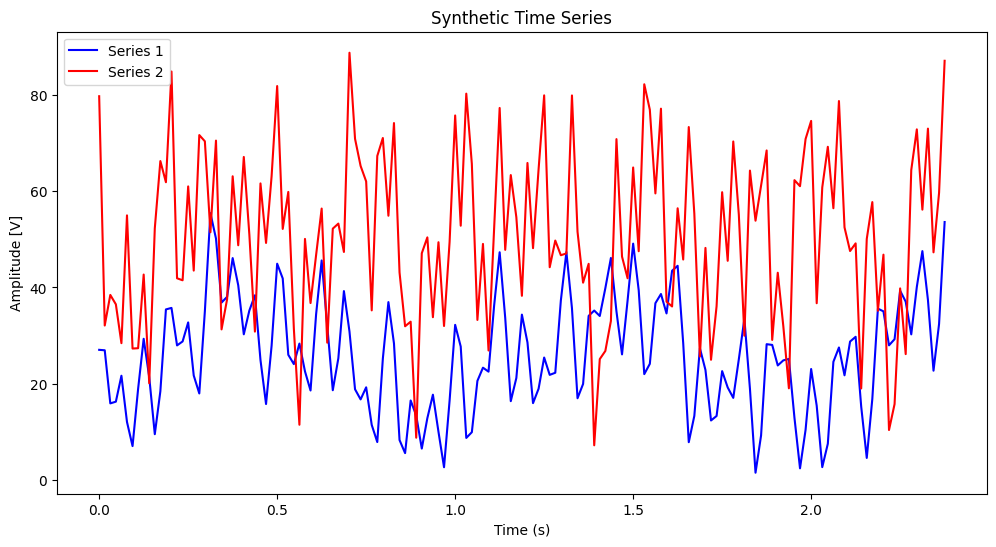

In [ ]:
# Combine sinusoids, linear trend, and noise
series1 = sum(sinusoids)   + noise1 + linear_trend1
series2 = sum(sinusoids2)  + noise2 + linear_trend2
# Plotting
plt.figure(figsize=(12, 6))

#plt.subplot(2, 1, 1)
plt.plot(t, series1, label='Series 1', color='blue')
plt.title('Synthetic Time Series')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude [V]')
#plt.grid(True)

#plt.subplot(2, 1, 2)
plt.plot(t, series2, label='Series 2', color='red')
# plt.title('Synthetic Time Series 2')
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude')
#plt.grid(True)
plt.legend()
#plt.tight_layout()
plt.show()

#analyses

In [ ]:
# Apply standard SciPy butter filter
def scipy_low_pass_filter(data, cutoff, fs, order=5):
    b, a = butter(order, cutoff / (0.5 * fs), btype='low')
    y = filtfilt(b, a, data)
    return y, b, a

# Apply standard SciPy high-pass filter
def scipy_high_pass_filter(data, cutoff, fs, order=5):
    b, a = butter(order, cutoff / (0.5 * fs), btype='high')
    y = filtfilt(b, a, data)
    return y, b, a

def scipy_band_pass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter(order, [lowcut / (0.5 * fs), highcut / (0.5 * fs)], btype='band')
    y = filtfilt(b, a, data)
    return y, b, a

def my_low_pass_kernel(cutoff, fs, numtaps=101):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    taps = np.sinc(2 * normal_cutoff * (np.arange(numtaps) - (numtaps - 1) / 2))
    window = np.hamming(numtaps)
    taps *= window
    taps /= np.sum(taps)
    return taps

def my_high_pass_kernel(cutoff, fs, numtaps=101):
    lp_kernel = my_low_pass_kernel(cutoff, fs, numtaps)
    hp_kernel = -lp_kernel
    hp_kernel[(numtaps - 1) // 2] += 1
    return hp_kernel

def custom_filter(data, kernel):
    return np.convolve(data, kernel, mode='same')

def my_band_pass_filter(data, low_cutoff, high_cutoff, fs, numtaps=101):
    # Create low-pass and high-pass kernels
    lp_kernel = my_low_pass_kernel(high_cutoff, fs, numtaps)
    hp_kernel = my_high_pass_kernel(low_cutoff, fs, numtaps)

    # Apply low-pass filter
    low_passed_data = custom_filter(data, lp_kernel)

    # Apply high-pass filter to the result of the low-pass filter
    band_passed_data = custom_filter(low_passed_data, hp_kernel)
    #band_passed_data = data - high_passed_data
    return band_passed_data

In [ ]:
cutoff_frequency = frequencies[-1]*1.2
# Choosing lower and upper cut-off frequencies to encompass the third and fourth sinusoids
high_pass_cutoff = frequencies[1] * 1.2  # 20% above the second-lowest frequency
band_pass_lowcut = frequencies[2] * 0.8  # 20% below the third frequency
band_pass_highcut = frequencies[3] * 1.2  # 20% above the fourth frequency

# Sampling frequency (inverse of delta)
fs = 1 / delta

In [ ]:
# Create low-pass and high-pass kernels
#lp_kernel1 = my_low_pass_kernel(cutoff_frequency, fs)
#hp_kernel = my_high_pass_kernel(high_pass_cutoff, fs)
# Apply custom filters
#low_passed1_custom = custom_filter(series1, lp_kernel1)
#high_passed_custom = custom_filter(series1, hp_kernel)
band_passed_custom = my_band_pass_filter(series1, band_pass_lowcut, band_pass_highcut, fs)

# compute the PSD
frequencies_psd, power_psd = my_psd(series1, , frequencies, delta)
frequencies_psd3, power_psd3 = my_psd(band_passed_custom, frequencies, delta)


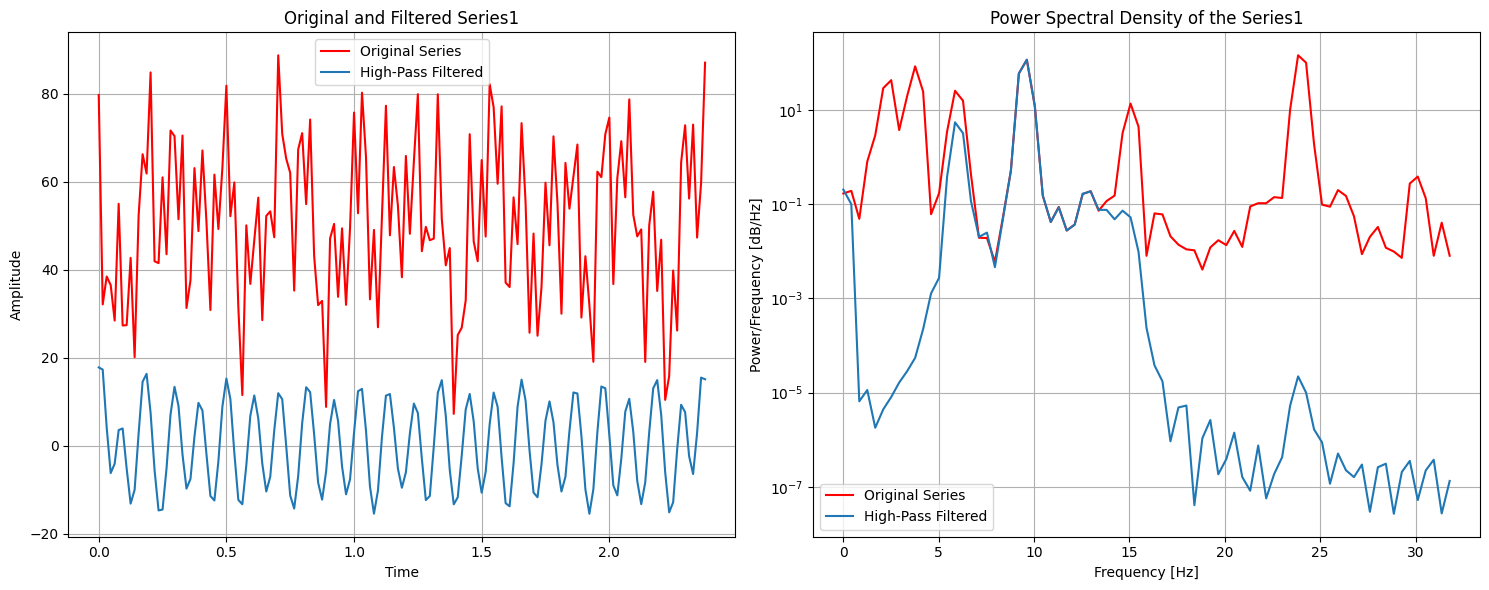

In [ ]:
plt.figure(figsize=(15, 6))

# Original Series Periodogram
plt.subplot(1, 2, 1)
plt.plot(t, series1, '-', color='red', label='Original Series')
#plt.plot(t, low_passed1_custom, color='blue', label='Low-Pass Filtered')
plt.plot(t, band_passed_custom, label='High-Pass Filtered')
#plt.plot(t, band_passed_custom, label='Band-Pass Filtered')
plt.title('Original and Filtered Series1')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# Extended Series color='lightblue', blue, lightsalmon, red
plt.subplot(1, 2, 2)
plt.semilogy(frequencies_psd, power_psd, '-', color='red', label='Original Series')
#plt.semilogy(frequencies_psd1, power_psd1, color='blue', label='Low-Pass Filtered')
plt.semilogy(frequencies_psd3, power_psd3, label='High-Pass Filtered')
#plt.semilogy(frequencies_psd3, power_psd3, label='Band-Pass Filtered')
plt.legend()
plt.title('Power Spectral Density of the Series1')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power/Frequency [dB/Hz]')
plt.grid(True)

plt.tight_layout()
plt.show()

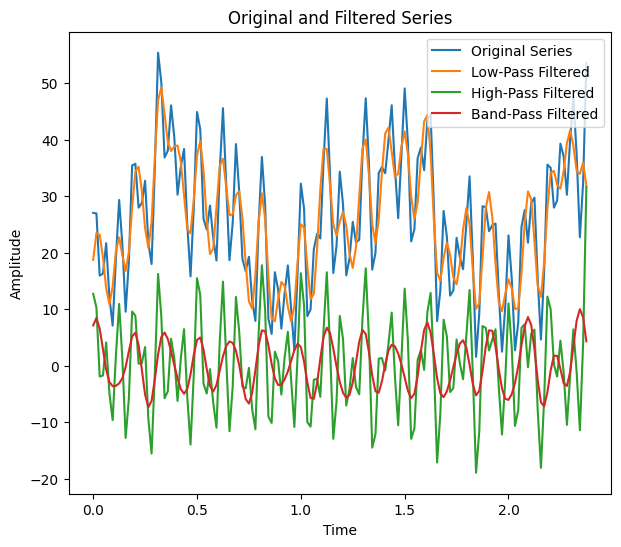

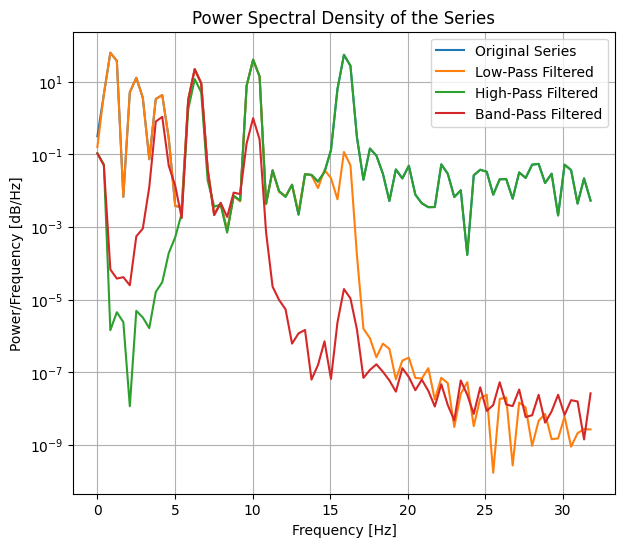

In [ ]:
# Create low-pass and high-pass kernels
lp_kernel1 = my_low_pass_kernel(cutoff_frequency, fs)
hp_kernel = my_high_pass_kernel(high_pass_cutoff, fs)
# Apply custom filters
low_passed1_custom = custom_filter(series1, lp_kernel1)
high_passed_custom = custom_filter(series1, hp_kernel)
band_passed_custom = my_band_pass_filter(series1, band_pass_lowcut, band_pass_highcut, fs)

# compute the PSD
frequencies_psd, power_psd = my_psd(series1, frequencies, delta)
frequencies_psd1, power_psd1 = my_psd(low_passed1_custom, frequencies, delta)
frequencies_psd2, power_psd2 = my_psd(high_passed_custom, frequencies, delta)
frequencies_psd3, power_psd3 = my_psd(band_passed_custom, frequencies, delta)

# Plot the original and filtered series
plt.figure(figsize=(7, 6))
plt.plot(t, series1, label='Original Series')
plt.plot(t, low_passed1_custom, label='Low-Pass Filtered')
plt.plot(t, high_passed_custom, label='High-Pass Filtered')
plt.plot(t, band_passed_custom, label='Band-Pass Filtered')
plt.title('Original and Filtered Series')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Plot the Power Spectral Density (PSD)
plt.figure(figsize=(7, 6))
plt.semilogy(frequencies_psd, power_psd, label='Original Series')
plt.semilogy(frequencies_psd1, power_psd1, label='Low-Pass Filtered')
plt.semilogy(frequencies_psd2, power_psd2, label='High-Pass Filtered')
plt.semilogy(frequencies_psd3, power_psd3, label='Band-Pass Filtered')
plt.legend()
plt.title('Power Spectral Density of the Series')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power/Frequency [dB/Hz]')
plt.grid(True)
plt.show()

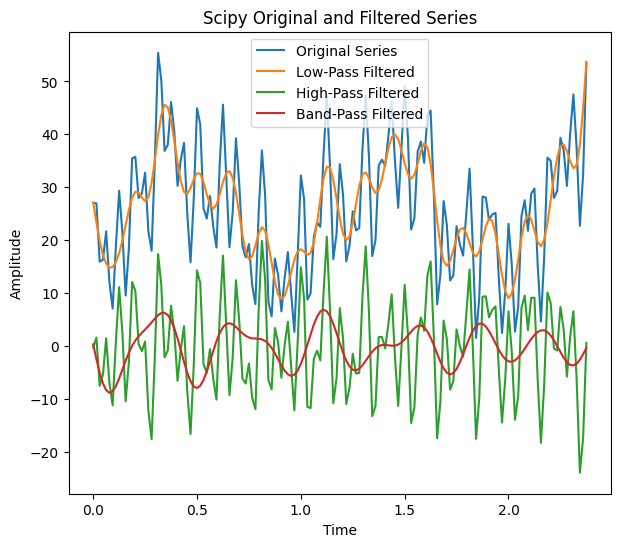

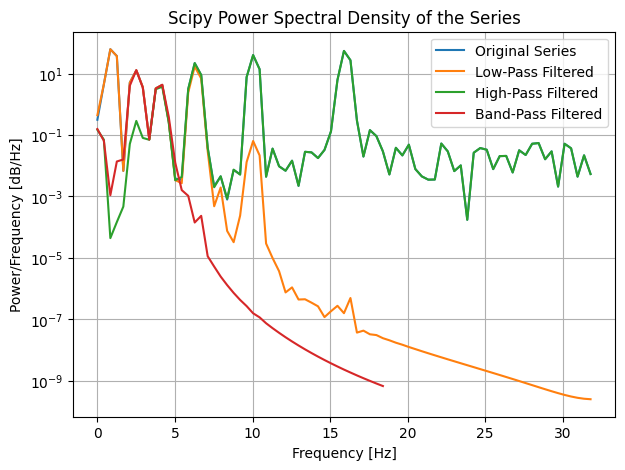

In [ ]:
# Apply standard SciPy filter with the same cut-off frequency as the custom filter
scipy_filtered_series1, b_low, a_low = scipy_low_pass_filter(series1, cutoff_frequency, fs)
scipy_filtered_series2, b_high, a_high = scipy_high_pass_filter(series1, high_pass_cutoff, fs)
scipy_filtered_series3, b_band, a_band = scipy_band_pass_filter(series1, band_pass_lowcut, band_pass_highcut, fs)

# Use Welch's method to compute the PSD
frequencies_psd, power_psd = my_psd(series1, frequencies, delta)
frequencies_psd1, power_psd1 = my_psd(scipy_filtered_series1, frequencies, delta)
frequencies_psd2, power_psd2 = my_psd(scipy_filtered_series2, frequencies, delta)
frequencies_psd3, power_psd3 = my_psd(scipy_filtered_series3, frequencies, delta)


# Plot the original and filtered series
plt.figure(figsize=(7, 6))
plt.plot(t, series1, label='Original Series')
plt.plot(t, scipy_filtered_series1, label='Low-Pass Filtered')
plt.plot(t, scipy_filtered_series2, label='High-Pass Filtered')
plt.plot(t, scipy_filtered_series3, label='Band-Pass Filtered')
plt.title('Scipy Original and Filtered Series')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Plot the Power Spectral Density (PSD)
plt.figure(figsize=(7, 5))
plt.semilogy(frequencies_psd, power_psd, label='Original Series')
plt.semilogy(frequencies_psd1, power_psd1, label='Low-Pass Filtered')
plt.semilogy(frequencies_psd2, power_psd2, label='High-Pass Filtered')
plt.semilogy(frequencies_psd3[:45], power_psd3[:45], label='Band-Pass Filtered')
plt.legend()
plt.title('Scipy Power Spectral Density of the Series')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power/Frequency [dB/Hz]')
plt.grid(True)
plt.show()

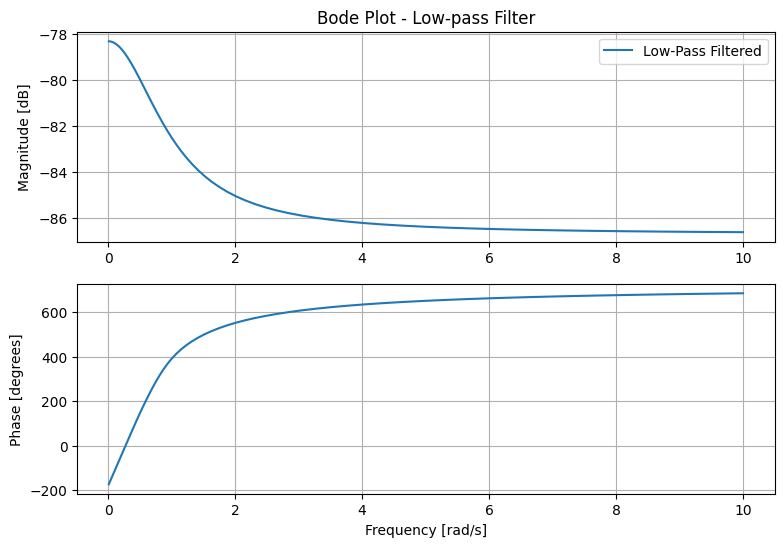

In [ ]:
# Bode plot for low-pass filter
w, mag, phase = bode((b_low, a_low))
w_h, mag_h, phase_h = bode((b_high, a_high))
w_b, mag_b, phase_b = bode((b_band, a_band))

plt.figure(figsize=(9, 6))
plt.subplot(2, 1, 1)
#plt.plot(w, mag)  # magnitude plot

plt.plot(w, mag, label='Low-Pass Filtered')
#plt.plot(w_h, mag_h, label='High-Pass Filtered')
#plt.plot(w_b, mag_b, label='Band-Pass Filtered')
plt.legend()
plt.grid(True)
plt.title('Bode Plot - Low-pass Filter')
plt.ylabel('Magnitude [dB]')

plt.subplot(2, 1, 2)
plt.plot(w_b, phase_b)  # phase plot
plt.grid(True)
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Phase [degrees]')
plt.show()

# periodgram

In [ ]:
def my_psd(series, frequencies, delta):
  power_spectrum, freqs = my_power_spectrum(series, delta)
  freqs_NZ = freqs.copy() # remove zeros
  freqs_NZ[0] = 1
  psd = power_spectrum/ freqs_NZ
  # Identifying the noise floor in the PSD
  # Assuming noise floor is relatively flat and occurs at higher frequencies
  # We can estimate it by taking an average over the high-frequency range

  # Selecting a high-frequency range for estimating the noise floor
  high_freq_range = freqs > (0.15 * max(frequencies))  # Consider frequencies above half of the maximum sinusoid frequency
  noise_floor = np.mean(psd[high_freq_range])

  # Calculating the bandwidth of the noise
  # Here, bandwidth is defined as the frequency range where the noise power is significant
  # We consider the range where the PSD is within a certain threshold of the noise floor
  threshold_factor = 0.5  # Threshold factor for determining significant noise power
  bandwidth_indices = np.where(psd < threshold_factor * noise_floor)[0]
  bandwidth = freqs[bandwidth_indices[-1]] - freqs[bandwidth_indices[0]]

  # Transforming the PSD into SNR in dB
  # SNR (dB) = 10 * log10(signal power / noise power)
  # Here, we consider signal power as the PSD and noise power as the noise floor
  snr_db = 10 * np.log10(psd / noise_floor)


  # Plotting the PSD in dB
  plt.figure(figsize=(12, 6))
  plt.semilogy(freqs, snr_db, label="PSD in dB for Extended Series1", color='blue')
  plt.title("Power Spectral Density (PSD) in dB of the Extended Time Series")
  plt.xlabel("Frequency [Hz]")
  plt.ylabel("SNR [dB]")
  plt.legend()
  plt.grid(True)
  plt.show()
